<h2>Import Libraries</h2>

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from math import log2

<h2>Import Dataset</h2>

In [39]:
df = pd.read_csv("restaurant.csv")
df.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,30-Oct,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


<h2>Preprocessing</h2>

<b>For preprocessing I split features and target and then encode the string datas to numeric</b>

In [40]:
features = ["Alt", "Bar", "Fri", "Hun", "Pat", "Price", "Rain", "Res", "Type", "Est"]
target = ["Wait"]

In [41]:
for col in features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

for col in target:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

<h2>Calculate entropy to find root</h2>

<b>For calculate entropy I define two function for `Entropy` and `Conditional Entropy` and i caculate the conditional entropy of all features<br>The feature with lowest conditional entropy would be select as `root` of decision tree</b>

In [42]:
def calculate_entropy(class_column):
    class_counts = class_column.value_counts()
    total = len(class_column)
    return -sum((count / total) * log2(count / total) for count in class_counts)

In [43]:
def conditional_entropy(df, feature, target):
    feature_values = df[feature].unique()
    entropy = 0
    for value in feature_values:
        subset = df[df[feature] == value]
        subset_entropy = calculate_entropy(subset[target])
        entropy += (len(subset) / len(df)) * subset_entropy
    return entropy

In [44]:
for feature in features:
    print(feature ,":" ,conditional_entropy(df, feature, target))

Alt : 1.0
Bar : 1.0
Fri : 0.979279160376092
Hun : 0.8042903712002691
Pat : 0.4591479170272448
Price : 0.8042903712002691
Rain : 1.0
Res : 0.979279160376092
Type : 0.9999999999999999
Est : 0.792481250360578


<b>As we can see `Pat` is the minimum conditional entropy between other features</b>

<h2>Create the whole tree(from scratch)</h2>

<b>For creating decision tree i set two function as `Information Gain` for calculating information gain and `Build Tree` for create tree</b>

In [45]:
def information_gain(y, y_left, y_right):
    return calculate_entropy(y) - conditional_entropy(y, y_left, y_right)

In [46]:
def build_tree(data, features, target):
    if len(data.iloc[:, -1].unique()) == 1:
        return data.iloc[0, -1]
    if len(features) == 0:
        return data.iloc[:, -1].mode()[0]
    info_gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(info_gains, key=info_gains.get)
    tree = {best_feature: {}}
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(columns=[best_feature])
        subtree = build_tree(subset, [f for f in features if f != best_feature], target)
        tree[best_feature][value] = subtree
    return tree

In [47]:
data = pd.read_csv('restaurant.csv')
tree_1 = build_tree(data, features, target)
print("Decision Tree:", tree_1)

Decision Tree: {'Pat': {'Some': 'Yes', 'Full': {'Hun': {'Yes': {'Type': {'Thai': {'Fri': {'No': 'No', 'Yes': 'Yes'}}, 'Italian': 'No', 'Burger': 'Yes'}}, 'No': 'No'}}, 'No': 'No'}}


<h2>Create Decision Tree(With Libraries)</h2>

<b>For create decision tree I use `sklearn` to create tree and `matplotlib` to visualize it</b>

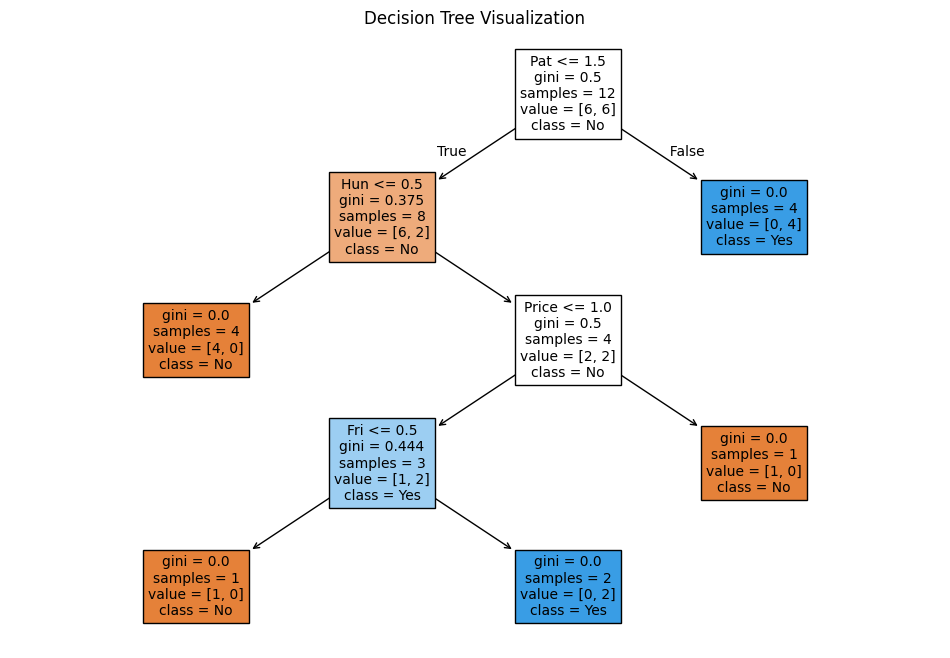

In [38]:
clf = DecisionTreeClassifier()
x = df[features]
y = df[target]
clf.fit(x, y)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(x.columns), class_names=le.inverse_transform(clf.classes_), filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()